In [78]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt
import pywt

In [79]:
image = plt.imread("./img/boat.png")[:,:,0]

# FFT Filtering

In [80]:
def lowpass_filter_fft(X, fcx, fcy):
    
    if X.ndim == 3:
        X = X[:,:,0]
        
    l_x, l_y = np.shape(X)
    mid_x = l_x//2
    mid_y = l_y//2
    
    F = np.fft.fft2(X)
    F = np.fft.fftshift(F)
    
    F[: mid_x - fcx//2, :] = 0
    F[mid_x + fcx//2 : , : ] = 0
    F[ : ,  : mid_y - fcy//2] = 0
    F[:, mid_y + fcy//2 : ] = 0
    
    
    return np.abs(fft.ifft2(F))

Text(0.5, 1.0, 'filtered image')

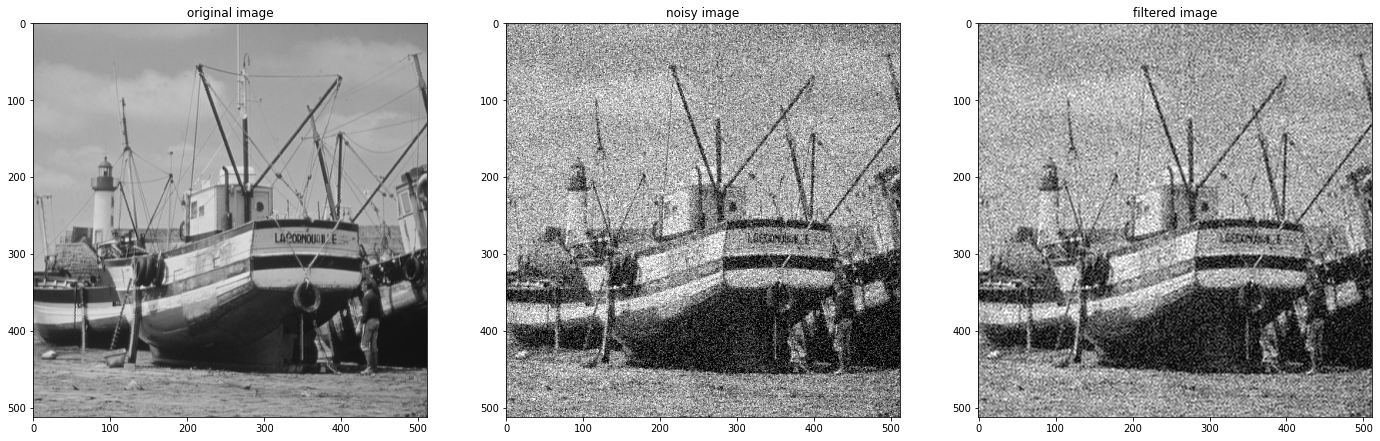

In [86]:
noisy_image = image + np.random.normal(scale=0.2,size=image.shape)

res = lowpass_filter_fft(noisy_image,250,250)

fig, ax = plt.subplots(1,3,figsize=(24,8))

ax[0].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original image")
ax[1].imshow(noisy_image, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("noisy image")
ax[2].imshow(res, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("filtered image")


In [82]:
def threshold_filter_fft(X, threshold):
    
    if X.ndim == 3:
        X = X[:,:,0]
    
    F = np.fft.fft2(X)
    F = np.fft.fftshift(F)

    F[np.abs(F) <= threshold] = 0
    
    return np.abs(fft.ifft2(F))

1.582155477664049e-05


Text(0.5, 1.0, 'filtered image')

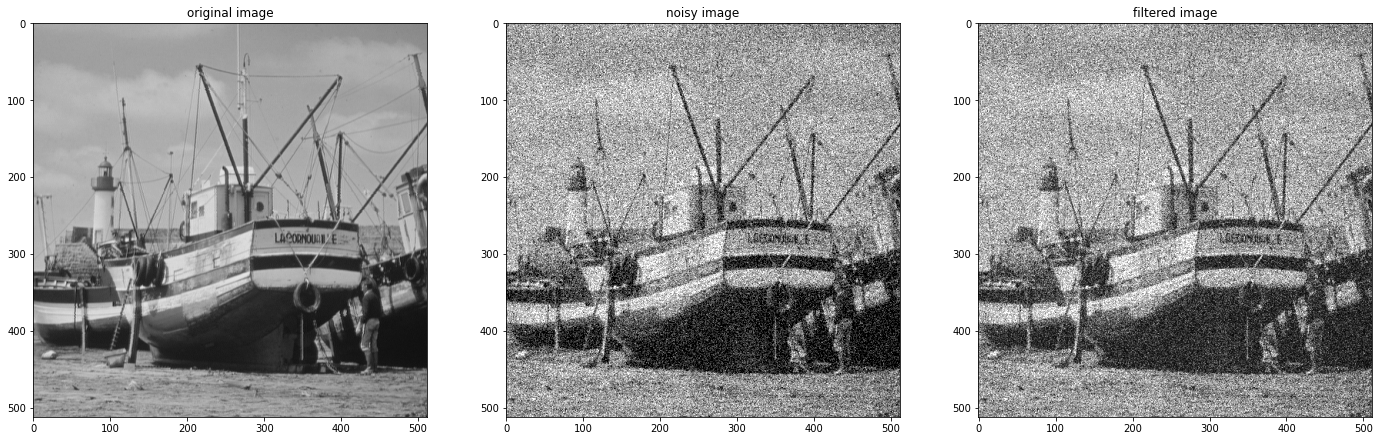

In [93]:
res = threshold_filter_fft(noisy_image,50)
print(res.min())

fig, ax = plt.subplots(1,3,figsize=(24,8))

ax[0].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original image")
ax[1].imshow(noisy_image, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("noisy image")
ax[2].imshow(res, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("filtered image")

# Wavelet Filtering

In [202]:
def threshold_filter_wavelet(X, level, wavelet='db1'):
    
    if X.ndim == 3:
        X = X[:,:,0]
    coeffs = pywt.wavedec2(X, wavelet, level=level)
    """cA = pywt.threshold(cA, threshold, mode="soft")
    cH = pywt.threshold(cH, threshold, mode="soft")
    cV = pywt.threshold(cV, threshold, mode="soft")
    cD = pywt.threshold(cD, threshold, mode="soft")"""

    return pywt.waverec2(coeffs[:5], wavelet)


Text(0.5, 1.0, 'filtered image')

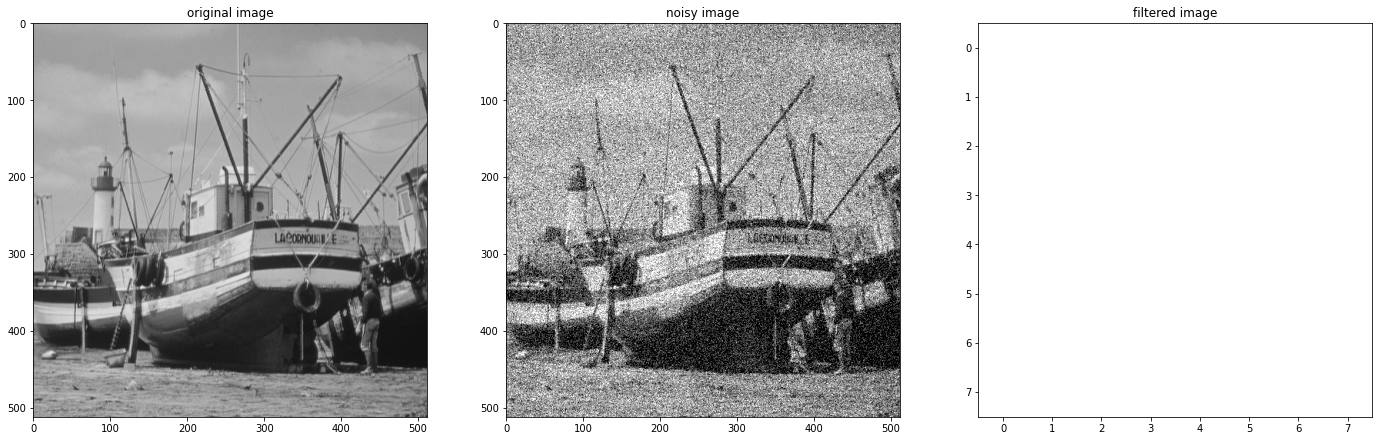

In [203]:
res = threshold_filter_wavelet(image,10, 'db1')

fig, ax = plt.subplots(1,3,figsize=(24,8))

ax[0].imshow(image, cmap='gray', vmin=0, vmax=1)
ax[0].set_title("original image")
ax[1].imshow(noisy_image, cmap='gray', vmin=0, vmax=1)
ax[1].set_title("noisy image")
ax[2].imshow(res, cmap='gray', vmin=0, vmax=1)
ax[2].set_title("filtered image")